# Descripción del Proyecto

Resolveremos varias tareas con la ayuda de machine learning para la compañía de seguros 'Sure Tomorrow':

**Tarea 1:**
- Encontrar clientes que sean similares a un cliente determinado. Esto ayudará a los agentes de la compañía con el marketing.

**Tarea 2:**
- Predecir la probabilidad de que un nuevo cliente reciba una prestación del seguro. ¿Puede un modelo predictivo funcionar mejor que un modelo dummy?

**Tarea 3:**
- Predecir el número de prestaciones de seguro que un nuevo cliente pueda recibir utilizando un modelo de regresión lineal.

**Tarea 4:** 
- Proteger los datos personales de los clientes sin afectar al modelo. Es necesario desarrollar un algoritmo de transformación de datos que dificulte la recuperación de la información personal si los datos llegaran a caer en manos equivocadas. Esto se denomina **enmascaramiento u ofuscación de datos**. Pero los datos deben protegerse de tal manera que no se vea afectada la calidad de los modelos de machine learning.

## Inicialización

In [105]:
pip install scikit-learn --upgrade

# Descripción de los datos

- **Características:** `sexo`, `edad`, `salario` y `número de familiares` de la persona asegurada.
- **Objetivo:** `número de beneficios de seguro` recibidos por una persona asegurada en los últimos cinco años.

# Importamos librerias y cargamos datos

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

import seaborn as sns

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
from sklearn.neighbors import NearestNeighbors
import sklearn.preprocessing
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

from IPython.display import display

In [55]:
#leemos los datos
df = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/insurance_us.csv')

# Preprocesamiento  y análisis exploratorio de datos

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              5000 non-null   int64  
 1   Age                 5000 non-null   float64
 2   Salary              5000 non-null   float64
 3   Family members      5000 non-null   int64  
 4   Insurance benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [57]:
df.isna().sum()

Gender                0
Age                   0
Salary                0
Family members        0
Insurance benefits    0
dtype: int64

In [58]:
df.shape

(5000, 5)

In [59]:
df.head()

,Gender,Age,Salary,Family members,Insurance benefits
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


Renombraremos columnas que lo necesiten para que el código se vea más coherente.

In [60]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [61]:
df.sample(10)

,gender,age,income,family_members,insurance_benefits
2584,1,20.0,33600.0,0,0
2743,1,34.0,31400.0,1,0
87,0,28.0,45900.0,0,0
4952,0,29.0,31700.0,1,0
2281,1,30.0,37200.0,1,0
2594,0,25.0,59500.0,1,0
1924,1,38.0,42300.0,2,0
170,1,37.0,54600.0,1,0
1483,0,37.0,42500.0,1,0
33,0,31.0,28100.0,0,0


In [62]:
# puede que queramos cambiar el tipo de edad (de float a int) aunque esto no es crucial
df['age'] = df['age'].astype(int)

In [63]:
# comprueba que la conversión se haya realizado con éxito
df['age'].dtypes

dtype('int32')

Revisamos si existen valores duplicados

In [64]:
duplicados = df.duplicated()
df[duplicados]

,gender,age,income,family_members,insurance_benefits
281,1,39,48100.0,1,0
488,1,24,32900.0,1,0
513,0,31,37400.0,2,0
718,1,22,32600.0,1,0
785,0,20,35800.0,0,0
...,...,...,...,...,...
4793,1,24,37800.0,0,0
4902,1,35,38700.0,1,0
4935,1,19,32700.0,0,0
4945,1,21,45800.0,0,0


In [65]:
df = df.drop_duplicates().reset_index(drop=True)
df.shape


(4847, 5)

Eliminamos las filas duplicadas y reseteamos el indice

In [66]:
#ahora analizaremos los datos descriptivos
df.describe()

,gender,age,income,family_members,insurance_benefits
count,4847.000000,4847.000000,4847.000000,4847.000000,4847.000000
mean,0.498453,31.023932,39895.811842,1.203425,0.152259
std,0.500049,8.487995,9972.953985,1.098664,0.468934
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33200.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


### Exploraremos la distribución de los datos de ingresos

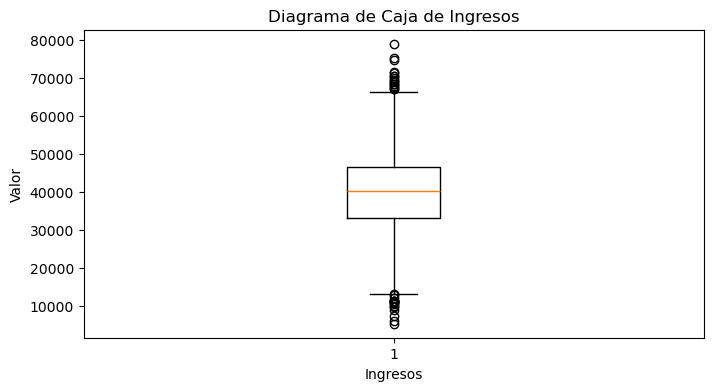

In [67]:
# Crear el diagrama de caja 
plt.figure(figsize=(8, 4))
plt.boxplot(df['income']) 
plt.title('Diagrama de Caja de Ingresos') 
plt.xlabel('Ingresos')
plt.ylabel('Valor')
plt.show()

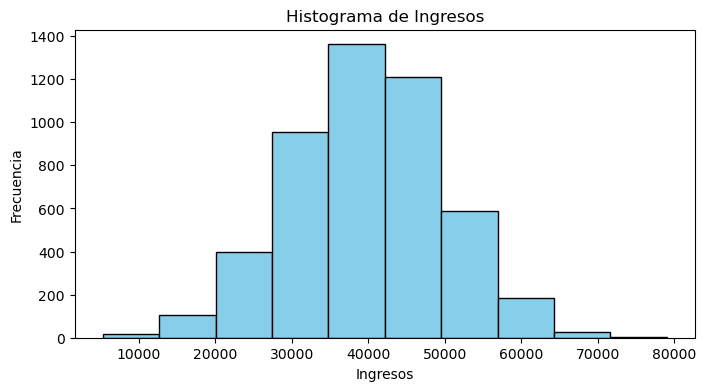

In [68]:
# Crear el histograma 
plt.figure(figsize=(8, 4))
plt.hist(df['income'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histograma de Ingresos') 
plt.xlabel('Ingresos') 
plt.ylabel('Frecuencia')
plt.show()

- Dataframe de 4847 filas y 5 columnas.
- Eliminamos valores duplicados, no hay valores nulos.
- La mayor cantidad de datos de ingresos se concentran en nuestro histograma en 40,000 y 50,000

### Identificar relaciones entre las distintas variables

C:\Users\T3R4BYT3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\T3R4BYT3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\T3R4BYT3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\T3R4BYT3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

C:\Users\T3R4BYT3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\T3R4BYT3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\T3R4BYT3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\T3R4BYT3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

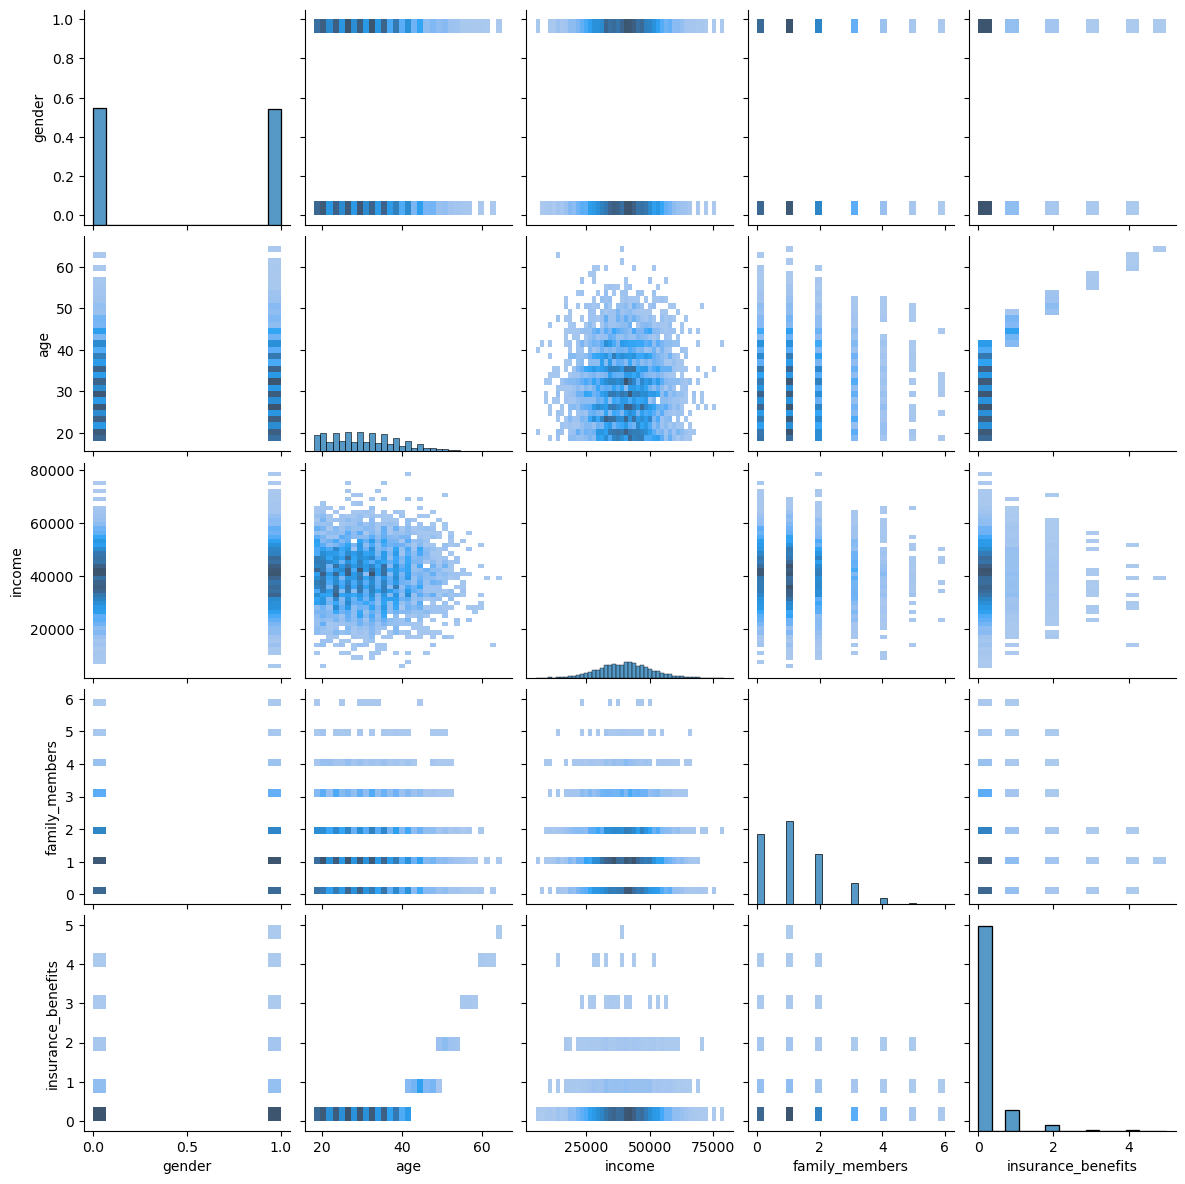

In [69]:
#Vamos a comprobar rápidamente si existen determinados grupos de clientes observando el gráfico de pares.
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

De acuerdo, es un poco complicado detectar grupos obvios (clústeres) ya que es difícil combinar diversas variables simultáneamente (para analizar distribuciones multivariadas). Ahí es donde LA y ML pueden ser bastante útiles.

# Tarea 1. Clientes similares

En el lenguaje de ML, es necesario desarrollar un procedimiento que devuelva los k vecinos más cercanos (objetos) para un objeto dado basándose en la distancia entre los objetos.
Para resolver la tarea, podemos probar diferentes métricas de distancia.

Escribiremos una función que devuelva los k vecinos más cercanos para un $n^{th}$ objeto basándonos en una métrica de distancia especificada. A la hora de realizar esta tarea tendremos en cuenta el número de prestaciones de seguro recibidas.

Probaremos para cuatro combinaciones de dos casos- Escalado/No Escalado
- Los datos no están escalados
- Los datos están escalados con el escalador [MaxAbsScaler]

- Métricas de distancia: Euclidiana
- Métricas de distancia: Manhattan

Responderemos las siguientes preguntas:
- ¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?
- ¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?

##  Función para calcular los k vecinos más cercanos.

In [70]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [71]:
def get_knn(df, n, k, metric):
    
    """
    Devuelve los k vecinos más cercanos

    :param df: DataFrame de pandas utilizado para encontrar objetos similares dentro del mismo lugar    :param n: número de objetos para los que se buscan los vecinos más cercanos    :param k: número de vecinos más cercanos a devolver
    :param métrica: nombre de la métrica de distancia    """

    nbrs = NearestNeighbors(n_neighbors=k, metric=metric)
    nbrs.fit(df[feature_names])
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

## Escalamos los datos

In [72]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [73]:
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
2369,1,0.676923,0.551899,0.500000,1
758,1,0.584615,0.649367,0.166667,0
4530,0,0.400000,0.286076,0.166667,0
2973,1,0.615385,0.698734,0.166667,0
1143,0,0.553846,0.387342,0.166667,0


Ahora, vamos a obtener registros similares para uno determinado, para cada combinación

In [74]:
# Índice del objeto para el cual se buscan los vecinos más cercanos
n = 0

In [75]:
# Número de vecinos más cercanos a devolver (3)
k = 4

In [76]:
# Combinaciones:
# 1. Datos no escalados, métrica Euclidiana
result1 = get_knn(df, n, k, metric='euclidean')
print("Datos no escalados, métrica Euclidiana:")
print(result1)
print("\n")

Datos no escalados, métrica Euclidiana:
      gender  age   income  family_members  insurance_benefits  distance
0          1   41  49600.0               1                   0  0.000000
1992       1   41  49600.0               0                   0  1.000000
1214       0   42  49600.0               0                   1  1.732051
3916       1   44  49600.0               2                   1  3.162278




C:\Users\T3R4BYT3\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [77]:
# 2. Datos no escalados, métrica Manhattan
result2 = get_knn(df, n, k, metric='manhattan')
print("Datos no escalados, métrica Manhattan:")
print(result2)
print("\n")

Datos no escalados, métrica Manhattan:
      gender  age   income  family_members  insurance_benefits  distance
0          1   41  49600.0               1                   0       0.0
1992       1   41  49600.0               0                   0       1.0
1214       0   42  49600.0               0                   1       3.0
3916       1   44  49600.0               2                   1       4.0




C:\Users\T3R4BYT3\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [78]:
# 3. Datos escalados con MaxAbsScaler, métrica Euclidiana
result3 = get_knn(df_scaled, n, k, metric='euclidean')
print("Datos escalados con MaxAbsScaler, métrica Euclidiana:")
print(result3)
print("\n")

Datos escalados con MaxAbsScaler, métrica Euclidiana:
      gender       age    income  family_members  insurance_benefits  distance
0          1  0.630769  0.627848        0.166667                   0  0.000000
2632       1  0.630769  0.634177        0.166667                   0  0.006329
133        1  0.615385  0.636709        0.166667                   0  0.017754
4720       1  0.646154  0.637975        0.166667                   1  0.018418




C:\Users\T3R4BYT3\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [79]:
# 4. Datos escalados con MaxAbsScaler, métrica Manhattan
result4 = get_knn(df_scaled, n, k, metric='manhattan')
print("Datos escalados con MaxAbsScaler, métrica Manhattan:")
print(result4)

Datos escalados con MaxAbsScaler, métrica Manhattan:
      gender       age    income  family_members  insurance_benefits  distance
0          1  0.630769  0.627848        0.166667                   0  0.000000
2632       1  0.630769  0.634177        0.166667                   0  0.006329
133        1  0.615385  0.636709        0.166667                   0  0.024245
4720       1  0.646154  0.637975        0.166667                   1  0.025511


C:\Users\T3R4BYT3\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


gracias a que teniamos la función bien definida se puede aplicar a diferentes datos (escalados y no escalados) usando solo una línea de código!

## Conclusión. Tarea 1

**¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?** 

claro que si afecta el algoritmo kNN, al no estar escalados la distancia es mucho mayor!! esto es porque:
Sin escalado, las características con valores más grandes pueden dominar la distancia, haciendo que la contribución de las características con valores más pequeños sea insignificante. Esto puede distorsionar la verdadera relación entre los datos.

**¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?** 


La distancia euclideana es menor que la manhattan no esten escalados o si esten escalados!!

# Tarea 2. ¿Es probable que el cliente reciba una prestación del seguro?

En términos de machine learning podemos considerarlo como una tarea de clasificación binaria.

Con el valor de `insurance_benefits` superior a cero como objetivo, evaluaremos si el enfoque de clasificación kNN puede funcionar mejor que el modelo dummy.
Instrucciones:
- Construiremos un clasificador basado en KNN y mediremos su calidad con la métrica F1 para k=1...10 tanto para los datos originales como para los escalados. Sería interesante observar cómo k puede influir en la métrica de evaluación y si el escalado de los datos provoca alguna diferencia. 
- Construiremos un modelo dummy en este caso es simplemente un modelo aleatorio. Debería devolver "1" con cierta probabilidad. - - Probaremos el modelo con cuatro valores de probabilidad:
- - 0 la probabilidad de pagar cualquier prestación del seguro
- - 0.12
- - 0.5
- - 1

La **probabilidad** de pagar cualquier prestación del seguro puede definirse como:


$$
P\{\text{prestación de seguro recibida}\}=\frac{\text{número de clientes que han recibido alguna prestación de seguro}}{\text{número total de clientes}}.
$$



In [80]:
# сalcula el objetivo
df['insurance_benefits_received'] = df['insurance_benefits'] > 0

In [81]:
# comprueba el desequilibrio de clases con value_counts()

df['insurance_benefits_received'].value_counts()

insurance_benefits_received
False    4284
True      563
Name: count, dtype: int64

In [82]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
# si tienes algún problema con la siguiente línea, reinicia el kernel y ejecuta el cuaderno de nuevo    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    # Matriz de confusión
    cm = confusion_matrix(y_true, y_pred, normalize = 'all')
    print('Matriz de confusión')
    print(cm)

In [83]:
# generar la salida de un modelo aleatorio

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [84]:
(df['insurance_benefits_received']==True).sum()/len(df)

0.11615432226119249

In [85]:
for P in [0, (df['insurance_benefits_received']==True).sum() / len(df), 0.5, 1]:

    print(f'La probabilidad: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, size=len(df))
        
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    
    print()

La probabilidad: 0.00
F1: 0.00
Matriz de confusión
[[0.88384568 0.        ]
 [0.11615432 0.        ]]

La probabilidad: 0.12
F1: 0.13
Matriz de confusión
[[0.78502166 0.09882401]
 [0.1017124  0.01444192]]

La probabilidad: 0.50
F1: 0.19
Matriz de confusión
[[0.44873117 0.4351145 ]
 [0.05921188 0.05694244]]

La probabilidad: 1.00
F1: 0.21
Matriz de confusión
[[0.         0.88384568]
 [0.         0.11615432]]



## Conclusion. Tarea 2

Aunque el F1 score más alto se obtiene con un umbral de probabilidad de 1.00, este modelo clasifica todas las instancias como positivas, lo que no es ideal si deseamos un balance entre precisión y recall.

Basado en las matrices de confusión y F1 scores, **el umbral de probabilidad 0.50** parece ser el mejor. Proporciona un balance razonable entre verdaderos positivos y falsos negativos, y un F1 score de 0.19, que es el segundo más alto

# Tarea 3. Regresión lineal

Con `insurance_benefits` como objetivo, evaluaremos cuál sería la RECM de un modelo de regresión lineal.
- Construiremos nuestra propia implementación de regresión lineal
- Comprobaremos la RECM tanto para los datos originales como para los escalados. ¿Habra alguna diferencia en la RECM ?

Denotemos:
- $X$: matriz de características
- cada fila es un caso
- cada columna es una característica (la primera columna está formada por unidades)
- $y:$  objetivo (un vector)- $\hat{y}$ 
- objetivo estimado (un vector)- $w$ 
- vector de pesos
La tarea de regresión lineal en el lenguaje de las matrices puede formularse así:
$$
y = Xw
$$

El objetivo de entrenamiento es entonces encontrar esa $w$ w que minimice la distancia L2 (ECM) entre $Xw$ y $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

hay una solución analítica para lo anteriormente expuesto:
$$
w = (X^T X)^{-1} X^T y
$$

La fórmula anterior puede servir para encontrar los pesos $w$ y estos últimos pueden utilizarse para calcular los valores predichos
$$
\hat{y} = X_{val}w
$$

Dividiremos todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30. Utilizaremos la métrica RECM para evaluar el modelo.

In [86]:
#Construccion de nuestra clase de Regresion Lineal propia.
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        # añadir las unidades
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        # Calcular los pesos usando la fórmula normal
        self.weights = np.linalg.inv(X2.T.dot(X2)).dot(X2.T).dot(y) 

    def predict(self, X):
        
        # añadir las unidades
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        y_pred = X2.dot(self.weights) 
        
        return y_pred

In [87]:
#Función para evaluar ciertas métricas de nuestro modelo 
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

In [88]:
#Caracteristycas y objetivos
x = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

#Division de 70% de nuestros datos de entrenamiento y 30% de prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12345)

#Asignamos una variable a nuestro modelo
lr = MyLinearRegression()

#Entrenamos nuestro modelo
lr.fit(x_train, y_train)
print(lr.weights)

#Metricas de nuestro modelo (RMSE, R2_score)
y_test_pred = lr.predict(x_test)
eval_regressor(y_test, y_test_pred)

[-9.77366729e-01  3.58042291e-02  1.95594888e-02  5.85336165e-07
 -1.21618420e-02]
RMSE: 0.36
R2: 0.66


## Conclusion. Tarea 3

**RMSE (Root Mean Squared Error)**
- **RMSE:** 0.36

- **Significado:** El RMSE mide la desviación estándar de los residuos (es decir, las diferencias entre los valores observados y los valores predichos por el modelo). En otras palabras, dice cuán lejos, en promedio, están las predicciones del modelo de los valores reales.
  - Un RMSE de 0.36 indica que, en promedio, las predicciones del modelo están a una distancia de 0.36 unidades de los valores observados. Cuanto más bajo sea el RMSE, mejor es el modelo en términos de precisión.


**R² score (Coeficiente de Determinación)**
- **R² score:** 0.66

- **Significado:** El R² mide la proporción de la variabilidad total en los datos que es explicada por el modelo. Su valor oscila entre 0 y 1, donde 1 indica que el modelo explica perfectamente la variabilidad de los datos y 0 indica que el modelo no explica nada de la variabilidad.

  - Un R² de 0.66 significa que el 66% de la variabilidad en los datos de salida puede ser explicada por el modelo. Esto es un indicador de que el modelo tiene una capacidad predictiva moderada.

**Desempeño del Modelo:**
 - **Un RMSE de 0.36** sugiere que las predicciones del modelo son razonablemente precisas, aunque no perfectas. 
 - **Un R² de 0.66** muestra que el modelo explica una buena parte de la variabilidad, pero aún hay un 34% de la variabilidad que no está siendo capturada por el modelo.

# Tarea 4. Ofuscar datos

Lo mejor es ofuscar los datos multiplicando las características numéricas (se pueden ver como la matriz $X$) por una matriz invertible $P$. 

$$
X' = X \times P
$$

comprobaremos cómo quedarán los valores de las características después de la transformación. La propiedad de invertibilidad es importante aquí, así que nos aseguraremos de que $P$ sea realmente invertible.

In [89]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [90]:
df_pn

,gender,age,income,family_members
0,1,41,49600.0,1
1,0,46,38000.0,1
2,0,29,21000.0,0
3,0,21,41700.0,2
4,1,28,26100.0,0
...,...,...,...,...
4842,0,28,35700.0,2
4843,0,34,52400.0,1
4844,0,20,33900.0,2
4845,1,22,32700.0,3


In [91]:
#matriz X
X = df_pn.to_numpy()
X

array([[1.00e+00, 4.10e+01, 4.96e+04, 1.00e+00],
       [0.00e+00, 4.60e+01, 3.80e+04, 1.00e+00],
       [0.00e+00, 2.90e+01, 2.10e+04, 0.00e+00],
       ...,
       [0.00e+00, 2.00e+01, 3.39e+04, 2.00e+00],
       [1.00e+00, 2.20e+01, 3.27e+04, 3.00e+00],
       [1.00e+00, 2.80e+01, 4.06e+04, 1.00e+00]])

Generar una matriz aleatoria $P$.

In [92]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

In [93]:
print("Matriz P generada aleatoriamente:")
print(P)

Matriz P generada aleatoriamente:
[[0.77395605 0.43887844 0.85859792 0.69736803]
 [0.09417735 0.97562235 0.7611397  0.78606431]
 [0.12811363 0.45038594 0.37079802 0.92676499]
 [0.64386512 0.82276161 0.4434142  0.22723872]]


Comprobar que la matriz P sea invertible

In [94]:
# Verificar si P es invertible
det_P = np.linalg.det(P)

if det_P != 0:
    print("La matriz P es invertible.")
else:
    print("La matriz P no es invertible.")

La matriz P es invertible.


In [95]:
# Asegurarnos de que P sea invertible
P_inv = np.linalg.inv(P)

In [96]:
#ofuscacion de datos
X_1 = np.dot(X,P)
X_1

array([[ 6359.71527314, 22380.40467609, 18424.09074184, 46000.69669016],
       [ 4873.29406479, 17160.36702982, 14125.78076133, 35253.45577301],
       [ 2693.11742928,  9486.397744  ,  7808.83156024, 19484.86063067],
       ...,
       [ 4346.2234249 , 15289.24126492, 12586.16264392, 31433.50888552],
       [ 4194.09324155, 14751.9910242 , 12144.02930637, 30323.88763426],
       [ 5205.46827354, 18314.24814446, 15077.01370762, 37649.59295455]])

**¿Podemos adivinar la edad o los ingresos de los clientes después de la transformación?**


No.
Una vez que los datos han sido ofuscados, adivinar la edad o los ingresos directamente a partir de los datos ofuscados es prácticamente imposible sin conocer la matriz 
P.

¿Podemos recuperar los datos originales de $X'$ si conoces $P$? Intentaremos comprobarlo a través de los cálculos moviendo $P$ del lado derecho de la fórmula anterior al izquierdo. En este caso las reglas de la multiplicación matricial son realmente útiles

In [97]:
X_originales = np.dot(X_1, P_inv)
X_originales

array([[1.00000000e+00, 4.10000000e+01, 4.96000000e+04, 1.00000000e+00],
       [6.66555413e-13, 4.60000000e+01, 3.80000000e+04, 1.00000000e+00],
       [3.84747671e-13, 2.90000000e+01, 2.10000000e+04, 1.41940791e-12],
       ...,
       [1.18077361e-12, 2.00000000e+01, 3.39000000e+04, 2.00000000e+00],
       [1.00000000e+00, 2.20000000e+01, 3.27000000e+04, 3.00000000e+00],
       [1.00000000e+00, 2.80000000e+01, 4.06000000e+04, 1.00000000e+00]])

**Muestra los tres casos para algunos clientes**
- Datos originales
- El que está transformado
- El que está invertido (recuperado)

In [98]:
X[0:3, :]

array([[1.00e+00, 4.10e+01, 4.96e+04, 1.00e+00],
       [0.00e+00, 4.60e+01, 3.80e+04, 1.00e+00],
       [0.00e+00, 2.90e+01, 2.10e+04, 0.00e+00]])

In [99]:
X_1[0:3, :]

array([[ 6359.71527314, 22380.40467609, 18424.09074184, 46000.69669016],
       [ 4873.29406479, 17160.36702982, 14125.78076133, 35253.45577301],
       [ 2693.11742928,  9486.397744  ,  7808.83156024, 19484.86063067]])

In [100]:
X_originales[0:3, :]

array([[1.00000000e+00, 4.10000000e+01, 4.96000000e+04, 1.00000000e+00],
       [6.66555413e-13, 4.60000000e+01, 3.80000000e+04, 1.00000000e+00],
       [3.84747671e-13, 2.90000000e+01, 2.10000000e+04, 1.41940791e-12]])

**podemos ver que algunos valores no son exactamente iguales a los de los datos originales. ¿Cuál podría ser la razón de ello?**

errores numéricos introducidos durante las operaciones de multiplicación y cálculo de la inversa de la matriz

# Prueba de que la ofuscación de datos puede funcionar con la Regresión Lineal (análiticamente)

La siguiente tarea es demostrar **analíticamente** que el método de ofuscación no afectará a la regresión lineal en términos de valores predichos, es decir, que sus valores seguirán siendo los mismos. 

Entonces, los datos están ofuscados y ahora tenemos $X \times P$ en lugar de tener solo $X$. En consecuencia, hay otros pesos $w_P$ como
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

¿Cómo se relacionarían $w$ y $w_P$ si simplificáramos la fórmula de $w_P$ anterior? 

¿Cuáles serían los valores predichos con $w_P$? 

¿Qué significa esto para la calidad de la regresión lineal si esta se mide mediante la RECM?

## Calculos de la demostración análitica

**Fórmula para los pesos en regresión lineal**

Para los datos originales $X$, los pesos $w$ se calculan como:

$w = (X^T X)^{-1} X^T y $

Para los datos ofuscados $X' = X \times P$, los pesos $w_P$ se calculan como:

$ w_P = [(X \times P)^T (X \times P)]^{-1} (X \times P)^T y$

**Simplificación de $w_P$**

Simplifiquemos $w_P$:

1. Transpuesta del producto:
$(X \times P)^T = P^T \times X^T $

2. Producto de matrices:
$(X \times P)^T (X \times P) = (P^T \times X^T) (X \times P)$

3. Asociatividad del producto:
$(P^T \times X^T) (X \times P) = P^T (X^T X) P $

4. Inversa del producto:
$[(X \times P)^T (X \times P)]^{-1} = [P^T (X^T X) P]^{-1} $

5. Inversa de una matriz de productos (usando que la inversa de un producto es el producto de las inversas en orden inverso):
$ [P^T (X^T X) P]^{-1} = P^{-1} (X^T X)^{-1} (P^T)^{-1} $

  $ (P^T)^{-1} = (P^{-1})^T $

 Por lo tanto,
 
 $[P^T (X^T X) P]^{-1} = P^{-1} (X^T X)^{-1} (P^{-1})^T $


6. Sustitución en la fórmula de $w_P$:

 $w_P = [P^{-1} (X^T X)^{-1} (P^{-1})^T] (X \times P)^T y $
 
 $w_P = P^{-1} (X^T X)^{-1} (P^{-1})^T P^T X^T y $
 

7. Simplificación del producto notando que $ (P^{-1})^T P^T = I $:

 $w_P = P^{-1} (X^T X)^{-1} X^T y $

**Relación entre $w$  y  $w_P$**

 Dado que:
 
 $ w = (X^T X)^{-1} X^T y $

Podemos ver que:

 $ w_P = P^{-1} w $

**Valores predichos**

Los valores predichos para los datos originales son:

 $\hat{y} = X w $

Para los datos ofuscados, los valores predichos son:

 $\hat{y}_P = X' w_P = (X \times P) w_P $

Sustituyendo $w_P$:

 $ \hat{y}_P = (X \times P) (P^{-1} w) $

 $ \hat{y}_P = X (P P^{-1}) w $
 
 $ \hat{y}_P = X I w $
 
 $ \hat{y}_P = X w $

### Conclusión

Por lo tanto, hemos demostrado que:

 $ \hat{y}_P = \hat{y} $


Esto significa que los valores predichos por un modelo de regresión lineal no cambian si los datos están ofuscados usando una matriz invertible 
$𝑃$. 
La ofuscación de los datos no afecta a los valores predichos, ya que los resultados siguen siendo los mismos después de desofuscar los datos.
El error cuadrático medio (RMSE) se calcula como:

 $\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} $
 
 
 donde: 
 
 $ {y}_i $ son los valores reales,
 
 $ \hat{y}_i $ son los valores predichos


Dado que $ \hat{y}_P = \hat{y} $, los valores predichos no cambian, lo cual implica que la diferencia $ {y}_i = \hat{y}_i $

también permanece igual. Por lo tanto, la RMSE no se ve afectada por la ofuscación de los datos.

Esta demostración confirma que la ofuscación no altera la precisión de los valores predichos en la regresión lineal.

# Prueba de Regresión Lineal (con ofuscación de datos)

Ahora, probemos que la regresión lineal pueda funcionar, en términos computacionales, con la transformación de ofuscación elegida.
Ejecutaremos la regresión lineal para los datos originales y los ofuscados, compararemos los valores predichos y los valores de las métricas RMSE y $R^2$. ¿Habrá alguna diferencia?

**Procedimiento**

- Creación de una matriz cuadrada $P$ de números aleatorios.
- Comprobaremos que sea invertible. Si no lo es, repetiremos el primer paso hasta obtener una matriz invertible.
- Utilizaremos $XP$ como la nueva matriz de características

In [101]:
#datos originales
y_test_pred = lr.predict(x_test)
eval_regressor(y_test, y_test_pred)

RMSE: 0.36
R2: 0.66


In [102]:
#datos ofuscados
X_1 # matriz ofuscada con las caracteristicas
#separar conjuntos de datos 70/30
X_1_train, X_1_test, y_train, y_test = train_test_split(X_1, y, test_size=0.3, random_state=12345)
model = MyLinearRegression()
model.fit(X_1_train, y_train)

predictions = model.predict(X_1_test)
eval_regressor(y_test, predictions)


RMSE: 0.36
R2: 0.66


In [103]:
predictions

array([-0.10668209,  0.22650175,  0.21925154, ...,  0.33212098,
        0.13128978,  0.30766708])

In [104]:
y_test_pred 

array([-0.1066821 ,  0.22650175,  0.21925153, ...,  0.332121  ,
        0.13128978,  0.3076671 ])

### Tarea.4 Conclusiones

No hay ninguna diferencia en las predicciones ni en las metricas con los datos ofuscados y sin ofuscar, los valores son los mismos.
La ofuscación de los datos utilizando una matriz invertible ${P}$ no afecta la calidad del modelo de regresión lineal en términos de los valores predichos ni en términos del error cuadrático medio (RMSE). Esto significa que podemos aplicar ofuscación a los datos para proteger la privacidad sin comprometer la precisión de las predicciones ni la evaluación de la calidad del modelo!!!

## Apendice A:

Podemos escribir fórmulas en Jupyter Notebook utilizando un lenguaje de marcado proporcionado por un sistema de publicación de alta calidad llamado $\LaTeX$ (se pronuncia como "Lah-tech"). Las fórmulas se verán como las de los libros de texto.

Para incorporar una fórmula a un texto, pon el signo de dólar (\\$) antes y después del texto de la fórmula, por ejemplo: $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

Si una fórmula debe estar en el mismo párrafo, pon el doble signo de dólar (\\$\\$) antes y después del texto de la fórmula, por ejemplo:
$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

El lenguaje de marcado de [LaTeX](https://es.wikipedia.org/wiki/LaTeX) es muy popular entre las personas que utilizan fórmulas en sus artículos, libros y textos. Puede resultar complicado, pero sus fundamentos son sencillos. Consulta esta [ficha de ayuda](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) (materiales en inglés) de dos páginas para aprender a componer las fórmulas más comunes.

## Apéndice B: Propiedades de las matrices

Las matrices tienen muchas propiedades en cuanto al álgebra lineal. Aquí se enumeran algunas de ellas que pueden ayudar a la hora de realizar la prueba analítica de este proyecto.

<table>
<tr>
<td>Distributividad</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>No conmutatividad</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Propiedad asociativa de la multiplicación</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Propiedad de identidad multiplicativa</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversibilidad de la transposición de un producto de matrices,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>